Programmer: Jacob Maurer
date: 9/21/2024
Description: This file is meant to make models that are trained on data other than the MNIST data set.

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_regression, make_multilabel_classification
import copy
device = "cuda"

For these experiments, we are going to assume about half of the features are informative, with no redundant or repeated features. The samples are going to be (5*number of features) * 10. This is going to be constant across regression and classification. The final sets will be balanced, seperate experiments will be run with unbalanced sets. The batch size will be 10.The split between train and test sets will be 80% training and 20% testing

In [3]:
small_classification_problem = make_classification(n_samples = 5000, n_features=100, n_informative=50)
medium_classification_problem = make_classification(n_samples = 15000, n_features=300, n_informative=150)
large_classification_problem = make_classification(n_samples = 25000, n_features=500, n_informative = 250)
small_regression_problem = make_regression(n_samples = 5000, n_features=100, n_informative=10)
medium_regression_problem = make_regression(n_samples = 15000, n_features=300, n_informative=25)
large_regression_problem = make_regression(n_samples = 25000, n_features=500, n_informative = 50)


In [4]:
small_c = pd.DataFrame(small_classification_problem[0])
small_c['100'] = small_classification_problem[1]
medium_c = pd.DataFrame(medium_classification_problem[0])
medium_c['300'] = medium_classification_problem[1]
large_c = pd.DataFrame(large_classification_problem[0])
large_c['500'] = large_classification_problem[1]
small_r = pd.DataFrame(small_regression_problem[0])
small_r['100'] = small_regression_problem[1]
medium_r = pd.DataFrame(medium_regression_problem[0])
medium_r['300'] = medium_regression_problem[1]
large_r = pd.DataFrame(large_regression_problem[0])
large_r['500'] = large_regression_problem[1]

In [5]:
class GeneratedDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x = copy.deepcopy(x_data)
        self.y = copy.deepcopy(y_data)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index], np.float32(self.y[index])

small_classification_train_data = GeneratedDataset(small_classification_problem[0][int(len(small_classification_problem[0])*.2):], small_classification_problem[1][int(len(small_classification_problem[1])*.2):])
small_classification_test_data = GeneratedDataset(small_classification_problem[0][:int(len(small_classification_problem[0])*.2)], small_classification_problem[1][:int(len(small_classification_problem[1])*.2)])
medium_classification_train_data = GeneratedDataset(medium_classification_problem[0][int(len(medium_classification_problem[0])*.2):], medium_classification_problem[1][int(len(medium_classification_problem[1])*.2):])
medium_classification_test_data = GeneratedDataset(medium_classification_problem[0][:int(len(medium_classification_problem[0])*.2)], medium_classification_problem[1][:int(len(medium_classification_problem[1])*.2)])
large_classification_train_data = GeneratedDataset(large_classification_problem[0][int(len(large_classification_problem[0])*.2):], large_classification_problem[1][int(len(large_classification_problem[1])*.2):])
large_classification_test_data = GeneratedDataset(large_classification_problem[0][:int(len(large_classification_problem[0])*.2)], large_classification_problem[1][:int(len(large_classification_problem[1])*.2)])
small_train_loader_class = DataLoader(small_classification_train_data, batch_size=100, shuffle=True)
small_test_loader_class = DataLoader(small_classification_test_data, batch_size=100, shuffle=True)
medium_train_loader_class = DataLoader(medium_classification_train_data, batch_size=100, shuffle=True)
medium_test_loader_class = DataLoader(medium_classification_test_data, batch_size=100, shuffle=True)
large_train_loader_class = DataLoader(large_classification_train_data, batch_size=100, shuffle=True)
large_test_loader_class = DataLoader(large_classification_test_data, batch_size=100, shuffle=True)
small_regression_train_data = GeneratedDataset(small_regression_problem[0][int(len(small_regression_problem[0])*.2):], small_regression_problem[1][int(len(small_regression_problem[1])*.2):])
small_regression_test_data = GeneratedDataset(small_regression_problem[0][:int(len(small_regression_problem[0])*.2)], small_regression_problem[1][:int(len(small_regression_problem[1])*.2)])
medium_regression_train_data = GeneratedDataset(medium_regression_problem[0][int(len(medium_regression_problem[0])*.2):], medium_regression_problem[1][int(len(medium_regression_problem[1])*.2):])
medium_regression_test_data = GeneratedDataset(medium_regression_problem[0][:int(len(medium_regression_problem[0])*.2)], medium_regression_problem[1][:int(len(medium_regression_problem[1])*.2)])
large_regression_train_data = GeneratedDataset(large_regression_problem[0][int(len(large_regression_problem[0])*.2):], large_regression_problem[1][int(len(large_regression_problem[1])*.2):])
large_regression_test_data = GeneratedDataset(large_regression_problem[0][:int(len(large_regression_problem[0])*.2)], large_regression_problem[1][:int(len(large_regression_problem[1])*.2)])
small_train_loader_regress = DataLoader(small_regression_train_data, batch_size=100, shuffle=True)
small_test_loader_regress = DataLoader(small_regression_test_data, batch_size=100, shuffle=True)
medium_train_loader_regress = DataLoader(medium_regression_train_data, batch_size=100, shuffle=True)
medium_test_loader_regress = DataLoader(medium_regression_test_data, batch_size=100, shuffle=True)
large_train_loader_regress = DataLoader(large_regression_train_data, batch_size=100, shuffle=True)
large_test_loader_regress = DataLoader(large_regression_test_data, batch_size=100, shuffle=True)

In [6]:
class SmallClassifyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(100, 128),
            nn.ELU(),
            nn.Linear(128, 128),
            nn.ELU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x.type(torch.float))
        return logits

class MediumClassifyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(300, 128),
            nn.Sigmoid(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        logits = self.linear_relu_stack(x.type(torch.float))
        return logits

class LargeClassifyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(500, 256),
            nn.Sigmoid(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x.type(torch.float))
        return logits

class SmallRegressNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(100, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.SiLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x.type(torch.float))
        return logits

class MediumRegressNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(300, 128),
            nn.Sigmoid(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x.type(torch.float))
        return logits

class LargeRegressNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(500, 128),
            nn.Sigmoid(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x.type(torch.float))
        return logits

In [7]:
small_model_class = SmallClassifyNetwork().to(device)
medium_model_class = MediumClassifyNetwork().to(device)
large_model_class = LargeClassifyNetwork().to(device)
small_model_regress = SmallRegressNetwork().to(device)
medium_model_regress = MediumRegressNetwork().to(device)
large_model_regress = LargeRegressNetwork().to(device)

loss_fn_class = nn.BCEWithLogitsLoss()
optimizer_class = torch.optim.SGD(small_model_class.parameters(), lr=1e-2)
loss_fn_regress = nn.MSELoss()
optimizer_regress = torch.optim.SGD(small_model_regress.parameters(), lr=1e-4)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(1))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        """
        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        """

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y.unsqueeze(1)).item()
            #pred = (pred > 0.5).type(torch.float)
            #correct += (pred == y.unsqueeze(1)).type(torch.float).sum().item()
    test_loss /= num_batches
    #correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [39]:
new_state = copy.deepcopy(small_model_regress.cpu().state_dict())
old_state = copy.deepcopy(small_model_regress.cpu().state_dict())
for key in new_state:
    new_state[key] = old_state[key] / 1.01
small_model_regress.load_state_dict(new_state)
small_model_regress.to(device)

SmallRegressNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [9]:
epochs = 30
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(small_train_loader_regress, small_model_regress, loss_fn_regress, optimizer_regress)
    test(small_test_loader_regress, small_model_regress, loss_fn_regress)
print("Done!")

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 30146.018750 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 30106.929688 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 29882.612109 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 13410.913477 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 338.706200 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 215.887773 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 179.178612 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 140.162143 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 120.542454 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 112.949309 

Epoch 11
-------------------------------
Test Error: 
 Accura

In [42]:
starting_model = copy.deepcopy(small_model_regress)

In [62]:
new_state = copy.deepcopy(starting_model.cpu().state_dict())
old_state = copy.deepcopy(starting_model.cpu().state_dict())
for key in new_state:
    new_state[key] = old_state[key] - 0.3
starting_model.load_state_dict(new_state)
starting_model.to(device)

SmallRegressNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [61]:
test(small_test_loader_regress, small_model_regress, loss_fn_regress)
test(small_test_loader_regress, starting_model, loss_fn_regress)

Test Error: 
 Accuracy: 0.0%, Avg loss: 33.959185 

Test Error: 
 Accuracy: 0.0%, Avg loss: 11382033.150000 



In [8]:
large_model_pre = copy.deepcopy(small_model_regress.cpu().state_dict())
small_model_regress.to(device)

SmallRegressNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): SiLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [10]:
large_model_post = copy.deepcopy(small_model_regress.cpu().state_dict())
small_model_regress.to(device)

SmallRegressNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): SiLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [11]:
large_model_pre

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[-0.0269,  0.0855, -0.0366,  ..., -0.0624,  0.0195,  0.0873],
                      [-0.0462, -0.0309,  0.0757,  ...,  0.0316,  0.0810,  0.0297],
                      [-0.0913, -0.0127,  0.0544,  ...,  0.0541, -0.0488,  0.0258],
                      ...,
                      [-0.0261, -0.0509, -0.0671,  ..., -0.0918, -0.0277, -0.0343],
                      [ 0.0474, -0.0255,  0.0784,  ...,  0.0198, -0.0280, -0.0056],
                      [ 0.0229, -0.0514, -0.0139,  ...,  0.0608, -0.0459,  0.0043]])),
             ('linear_relu_stack.0.bias',
              tensor([-0.0315,  0.0042, -0.0359,  0.0179,  0.0234,  0.0774, -0.0863,  0.0407,
                       0.0481,  0.0927,  0.0183, -0.0791, -0.0192, -0.0839, -0.0871,  0.0038,
                      -0.0293,  0.0635,  0.0833,  0.0282, -0.0052,  0.0089, -0.0683, -0.0612,
                       0.0827, -0.0714, -0.0426,  0.0230,  0.0338,  0.0857,  0.0132,  0.0294,
    

In [12]:
large_model_post

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[-0.0555,  0.0757, -0.0405,  ..., -0.1647,  0.0397,  0.0885],
                      [-0.0461, -0.0401,  0.0779,  ...,  0.0847,  0.0869,  0.0358],
                      [-0.1130, -0.0118,  0.0413,  ...,  0.2146, -0.0571,  0.0036],
                      ...,
                      [-0.0271, -0.0417, -0.0593,  ..., -0.2491, -0.0336, -0.0575],
                      [ 0.0455, -0.0305,  0.0852,  ...,  0.0165, -0.0285, -0.0101],
                      [ 0.0447, -0.0851,  0.0169,  ...,  0.4125, -0.0506, -0.0280]])),
             ('linear_relu_stack.0.bias',
              tensor([ 0.0969,  0.0384,  0.0631,  0.0758,  0.0817,  0.0890,  0.0075,  0.0869,
                       0.1572,  0.2375,  0.1454,  0.0280,  0.0793, -0.1137, -0.0150,  0.1430,
                      -0.0178,  0.1633,  0.1670,  0.1150, -0.0244,  0.1199,  0.0109,  0.0050,
                       0.0960, -0.0972, -0.0230,  0.0812,  0.1358,  0.2691,  0.1016,  0.0864,
    

In [10]:
mean_pre_0 = np.mean(large_model_pre["linear_relu_stack.0.weight"].numpy())
mean_post_0 = np.mean(large_model_post["linear_relu_stack.0.weight"].numpy())
std_pre_0 = np.std(large_model_pre["linear_relu_stack.0.weight"].numpy())
std_post_0 = np.std(large_model_post["linear_relu_stack.0.weight"].numpy())
mean_pre_1 = np.mean(large_model_pre["linear_relu_stack.2.weight"].numpy())
mean_post_1 = np.mean(large_model_post["linear_relu_stack.2.weight"].numpy())
std_pre_1 = np.std(large_model_pre["linear_relu_stack.2.weight"].numpy())
std_post_1 = np.std(large_model_post["linear_relu_stack.2.weight"].numpy())
print("Pre: ")
print(" Layer 1: " + str(mean_pre_0) + ", " + str(std_pre_0))
print(" Layer 2: " + str(mean_pre_1) + ", " + str(std_pre_1))
print("Post: ")
print(" Layer 1: " + str(mean_post_0) + ", " + str(std_post_0))
print(" Layer 2: " + str(mean_post_1) + ", " + str(std_post_1))

NameError: name 'large_model_post' is not defined

In [15]:
ID = 1
for item in large_model_post:
    if item[20:] == "weight":
        table = pd.DataFrame(large_model_post[item])
        table.to_csv("results/relu_silu_small_regress_weight_post_" + str(ID) + ".csv",index=False)
    if item[20:] == "bias":
        series = pd.Series(large_model_post[item])
        series.to_csv("results/relu_silu_small_regress_bias_post_" + str(ID) + ".csv",index=False)
    ID += 1

In [16]:
ID = 1
for item in large_model_pre:
    if item[20:] == "weight":
        table = pd.DataFrame(large_model_pre[item])
        table.to_csv("results/relu_silu_small_regress_weight_pre_" + str(ID) + ".csv",index=False)
    if item[20:] == "bias":
        series = pd.Series(large_model_pre[item])
        series.to_csv("results/relu_silu_small_regress_bias_pre_" + str(ID) + ".csv",index=False)
    ID += 1

Based on the newer experiments, it seems that Binary Classification partialy follows what was found with MNIST, and Regression doesn't really follow at all. For regression this makes sense, as the network is trying to predict a value along all real numbers as oposed to some set of choices. For Binary classification, it has always been close, but not really solid. There were times where it did follow MNIST, and other times where it didn't follow at all. It could be possible the data in the images in MNIST are different than the generated sets, but i have no idea at this point on how to characterize the MNIST set to be similiar with sklearn's make_classification. Have not yet tested the make_multiclass_classification, and have not yet dived into the Heatmaps of weights for the networks.

In [84]:
large_multiclass_problem = make_multilabel_classification(n_samples=25000, n_features=500, n_classes=10, n_labels=2)


In [96]:
large_multiclass_train_data = GeneratedDataset(large_multiclass_problem[0][int(len(large_multiclass_problem[0])*.2):], large_multiclass_problem[1][int(len(large_multiclass_problem[1])*.2):])
large_multiclass_test_data = GeneratedDataset(large_multiclass_problem[0][:int(len(large_multiclass_problem[0])*.2)], large_multiclass_problem[1][:int(len(large_multiclass_problem[1])*.2)])
large_train_loader_multiclass = DataLoader(large_multiclass_train_data, batch_size=100, shuffle=True)
large_test_loader_multiclass = DataLoader(large_multiclass_test_data, batch_size=100, shuffle=True)

In [127]:
class LargeMulticlassNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(500, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x.type(torch.float))
        return logits

model = LargeMulticlassNetwork().to(device)
loss = nn.CrossEntropyLoss()
optimize = torch.optim.SGD(model.parameters(), lr=1e-1)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        """
        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        """

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # pred = (pred > 0.5).type(torch.float)
            # correct += (pred == y.unsqueeze(1)).type(torch.float).sum().item()
    test_loss /= num_batches
    # correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [128]:
pre_trained_multiclass = copy.deepcopy(model.cpu().state_dict())
model.to(device)
epochs = 30
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(large_train_loader_multiclass, model, loss, optimize)
    test(large_test_loader_multiclass, model, loss)
print("Done!")
post_trained_multiclass = copy.deepcopy(model.cpu().state_dict())
model.to(device)

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.441471 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.449458 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.431501 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.441189 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.432633 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.425189 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.433316 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.418330 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.416986 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.409183 

Epoch 11
-------------------------------
Test Error: 
 Accuracy: 0.0%, Avg loss: 4.402614

LargeMulticlassNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=500, out_features=512, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [129]:
pre_trained_multiclass

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[-0.0442, -0.0267, -0.0142,  ..., -0.0404,  0.0069, -0.0183],
                      [-0.0080, -0.0214,  0.0314,  ...,  0.0024,  0.0401,  0.0208],
                      [ 0.0328,  0.0305,  0.0125,  ..., -0.0054,  0.0332,  0.0372],
                      ...,
                      [ 0.0295,  0.0069,  0.0092,  ..., -0.0432,  0.0014,  0.0428],
                      [-0.0401, -0.0193, -0.0308,  ...,  0.0003, -0.0158,  0.0322],
                      [-0.0280,  0.0170,  0.0132,  ..., -0.0377, -0.0099, -0.0394]])),
             ('linear_relu_stack.0.bias',
              tensor([ 4.2919e-02, -1.5841e-02, -1.6990e-02,  3.6192e-02, -2.4385e-02,
                       9.3218e-03, -3.9001e-02,  2.3250e-02,  9.7217e-03,  4.5774e-04,
                       3.9148e-02,  1.4828e-02,  1.2344e-02,  3.8993e-02, -4.0246e-02,
                      -1.2096e-03, -2.7187e-02, -3.4861e-02,  2.7642e-02,  4.5555e-03,
                      -1.9925e-0

In [130]:
post_trained_multiclass

OrderedDict([('linear_relu_stack.0.weight',
              tensor([[-0.0418, -0.0115, -0.0255,  ..., -0.0429,  0.0054, -0.0207],
                      [-0.0004, -0.0126,  0.0411,  ..., -0.0120,  0.0354,  0.0257],
                      [ 0.0204,  0.0260,  0.0241,  ..., -0.0063,  0.0149,  0.0230],
                      ...,
                      [ 0.0067,  0.0153,  0.0120,  ..., -0.0384, -0.0111,  0.0280],
                      [-0.0528, -0.0116, -0.0123,  ..., -0.0145, -0.0355,  0.0126],
                      [-0.0372,  0.0035,  0.0203,  ..., -0.0230, -0.0341, -0.0667]])),
             ('linear_relu_stack.0.bias',
              tensor([ 0.0228, -0.0306, -0.0354,  0.0174, -0.0305, -0.0114, -0.0583, -0.0008,
                      -0.0036, -0.0196,  0.0155,  0.0022,  0.0083,  0.0215, -0.0586, -0.0144,
                      -0.0454, -0.0503,  0.0060, -0.0172, -0.0233, -0.0360, -0.0346, -0.0632,
                       0.0055, -0.0293, -0.0087, -0.0359,  0.0125,  0.0031, -0.0110, -0.0035,
    

In [131]:
mean_pre_0 = np.mean(pre_trained_multiclass["linear_relu_stack.0.weight"].numpy())
mean_post_0 = np.mean(post_trained_multiclass["linear_relu_stack.0.weight"].numpy())
std_pre_0 = np.std(pre_trained_multiclass["linear_relu_stack.0.weight"].numpy())
std_post_0 = np.std(post_trained_multiclass["linear_relu_stack.0.weight"].numpy())
mean_pre_1 = np.mean(pre_trained_multiclass["linear_relu_stack.2.weight"].numpy())
mean_post_1 = np.mean(post_trained_multiclass["linear_relu_stack.2.weight"].numpy())
std_pre_1 = np.std(pre_trained_multiclass["linear_relu_stack.2.weight"].numpy())
std_post_1 = np.std(post_trained_multiclass["linear_relu_stack.2.weight"].numpy())
mean_pre_2 = np.mean(pre_trained_multiclass["linear_relu_stack.4.weight"].numpy())
mean_post_2 = np.mean(post_trained_multiclass["linear_relu_stack.4.weight"].numpy())
std_pre_2 = np.std(pre_trained_multiclass["linear_relu_stack.4.weight"].numpy())
std_post_2 = np.std(post_trained_multiclass["linear_relu_stack.4.weight"].numpy())
print("Pre: ")
print(" Layer 1: " + str(mean_pre_0) + ", " + str(std_pre_0))
print(" Layer 2: " + str(mean_pre_1) + ", " + str(std_pre_1))
print(" Layer 3: " + str(mean_pre_2) + ", " + str(std_pre_2))
print("Post: ")
print(" Layer 1: " + str(mean_post_0) + ", " + str(std_post_0))
print(" Layer 2: " + str(mean_post_1) + ", " + str(std_post_1))
print(" Layer 3: " + str(mean_post_2) + ", " + str(std_post_2))

Pre: 
 Layer 1: 8.3034996e-07, 0.025849843
 Layer 2: 7.102816e-05, 0.025543222
 Layer 3: 0.00018317447, 0.02547586
Post: 
 Layer 1: -0.0015452711, 0.03388202
 Layer 2: -0.005922225, 0.03329243
 Layer 3: 0.0001834683, 0.123158395


In [138]:
ID = 1
for item in post_trained_multiclass:
    if item[20:] == "weight":
        table = pd.DataFrame(post_trained_multiclass[item])
        table.to_csv("results/nonMNIST_multi_weight_post_" + str(ID) + ".csv",index=False)
    if item[20:] == "bias":
        series = pd.Series(post_trained_multiclass[item])
        series.to_csv("results/nonMNIST_multi_bias_post_" + str(ID) + ".csv",index=False)
    ID += 1

9/23/2024 - There is a separation between Classification problems and regression problems in terms of network updates. Classification problems build upon patterns previously found in the network, unless it is very extreme. 

I think these results indicate that rather than there being special characteristics of the MNIST dataset, The Neural Networks have different update patterns depending on the type of problem. It could be possible that the Loss functions impact the way a network updates, since the loss directly impacts the update pattern. However, given the results of the previous sets, this doesn't seem to be the case. I have not been testing for this, though, so this should be taken lightly.

Text(0.5, 1.0, 'Heatmap Data X')

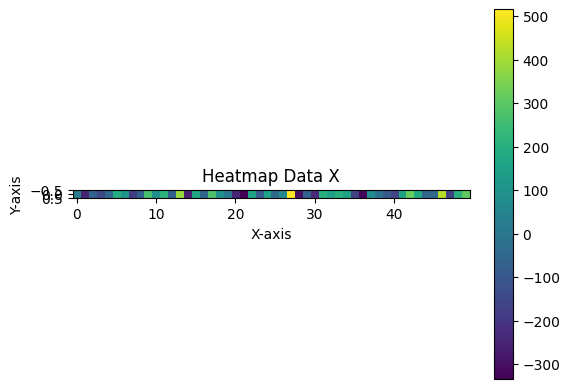

In [49]:
import matplotlib.pyplot as plt
# Create the heatmap
column_start = 0
row_start = 0
window = 1

fig = plt.figure(0)
plt.imshow([small_regression_problem[1][:50]], cmap='viridis', interpolation='nearest')

# Add a colorbar for reference
plt.colorbar()

# Add labels (optional)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap Data X')